In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading dataset

In [2]:
df_heart = pd.read_csv("../ml_pro/data/heart.csv")

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Target and features split

In [4]:
df_features = df_heart.drop(['target'], axis =1)
df_target = df_heart['target']

Feature normalization

In [5]:
df_features = StandardScaler().fit_transform(df_features)

Train/Test split. random state is used to apply repetitivity to get always the same split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


Implementing PCA. Number of components is defined to 3 only for testing. Incremental PCA is also used for comparison

In [9]:
pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

print(pca.components_)

[[ 0.33527191  0.09215252 -0.2972829   0.19136981  0.11723709  0.10735025
  -0.16607168 -0.41817352  0.34511992  0.38930543 -0.34529893  0.30603618
   0.20694842]
 [ 0.39216308 -0.31856592  0.24635573  0.4548299   0.30081826  0.39964943
  -0.21224254  0.1214095  -0.2631754  -0.13665124  0.13775127  0.16526553
  -0.18149674]
 [ 0.01527482 -0.21333304  0.39502295  0.08577265 -0.28700795 -0.00715604
   0.18451137 -0.12254874 -0.17544049  0.3831776  -0.55090963 -0.26763552
  -0.32654797]]


Plotting the eigen-values proportion for the new 3 components/features

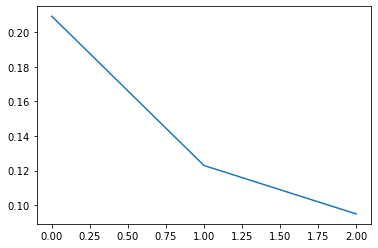

In [12]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

Applying logistic regression and getting the accuracy score

In [14]:
logistic = LogisticRegression(solver='lbfgs')

df_train = pca.transform(X_train)
df_test = pca.transform(X_test)
logistic.fit(df_train, y_train)
print("SCORE PCA: ", logistic.score(df_test, y_test))

logistic_i = LogisticRegression(solver='lbfgs')

df_train_i = ipca.transform(X_train)
df_test_i = ipca.transform(X_test)
logistic_i.fit(df_train_i, y_train)
print("SCORE iPCA: ", logistic_i.score(df_test_i, y_test))

SCORE PCA:  0.7857142857142857
SCORE iPCA:  0.8051948051948052


Conclusion: We have reduced the dimension of our problem from 13 features to 3 getting a score of 78%. Not bad

Repeating the process only with iPCA and 4 components

In [15]:
ipca_4 = IncrementalPCA(n_components=4, batch_size=10)
ipca_4.fit(X_train)

logistic_i4 = LogisticRegression(solver='lbfgs')

df_train_i4 = ipca_4.transform(X_train)
df_test_i4 = ipca_4.transform(X_test)

logistic_i4.fit(df_train_i4, y_train)
print("SCORE iPCA 4: ", logistic_i4.score(df_test_i4, y_test))

SCORE iPCA 4:  0.8084415584415584


Repeating the process only with iPCA and 6 components

In [16]:
ipca_6 = IncrementalPCA(n_components=6, batch_size=10)
ipca_6.fit(X_train)

logistic_i6 = LogisticRegression(solver='lbfgs')

df_train_i6 = ipca_6.transform(X_train)
df_test_i6 = ipca_6.transform(X_test)

logistic_i6.fit(df_train_i6, y_train)
print("SCORE iPCA 6: ", logistic_i6.score(df_test_i6, y_test))

SCORE iPCA 6:  0.8051948051948052


Conclusion: As we can see, incrementing the number of components in this particular example didn't result in an increment of the score